# <p style="text-align: center;"> <b> Asking some meaningful questions about the data </b></p>
---

## Table of Contents


---

# 1. Introduction <a class="anchor" id="introduction"></a>

## 1.1 Requirements <a class="anchor" id="requirements"></a>

# 2. Implementation <a class="anchor" id="implementation"></a>

## Import libraries <a class="anchor" id="import_libraries"></a>

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import re
from datetime import datetime
import datetime as dt
from collections import Counter
import warnings
from ast import literal_eval
from sklearn.preprocessing import MinMaxScaler

# Turn off warnings
warnings.filterwarnings("ignore")

In [18]:
# pd.set_option('display.max_columns', None)
manga_df = pd.read_csv('../data/processed_comic.csv')
manga_df.head()

,Title,Score,Vote,Ranked,Popularity,Members,Favorite,Volumes,Chapters,Status,Genres,Author,Recommended,Mixed Feelings,Not Recommended,Release date,Time from release (months)
0,Berserk,9.47,331288,1,1,665300,122841,4.0,23.0,Publishing,"['Action', 'Adventure', 'Award Winning', 'Dram...","['Miura Kentarou', 'Studio Gaga']",233,15,10,1989-08-25,411
1,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,9.30,156368,2,26,256146,42864,24.0,96.0,Finished,"['Action', 'Adventure', 'Mystery', 'Supernatur...",['Araki Hirohiko'],120,7,1,2004-01-19,87
2,Vagabond,9.24,136403,3,15,364891,40158,37.0,327.0,On Hiatus,"['Action', 'Adventure', 'Award Winning']","['Inoue Takehiko', 'Yoshikawa Eiji']",88,8,1,1998-09-03,201
3,One Piece,9.22,366668,4,3,599278,114531,4.0,23.0,Publishing,"['Action', 'Adventure', 'Fantasy']",['Oda Eiichiro'],173,17,16,1997-07-22,317
4,Monster,9.15,93945,5,29,236355,20501,18.0,162.0,Finished,"['Award Winning', 'Drama', 'Mystery']",['Urasawa Naoki'],64,7,5,1994-12-05,84


In [19]:
manga_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6128 entries, 0 to 6127
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Title                       6128 non-null   object 
 1   Score                       6128 non-null   float64
 2   Vote                        6128 non-null   int64  
 3   Ranked                      6128 non-null   int64  
 4   Popularity                  6128 non-null   int64  
 5   Members                     6128 non-null   int64  
 6   Favorite                    6128 non-null   int64  
 7   Volumes                     6128 non-null   float64
 8   Chapters                    6128 non-null   float64
 9   Status                      6128 non-null   object 
 10  Genres                      6128 non-null   object 
 11  Author                      6128 non-null   object 
 12  Recommended                 6128 non-null   int64  
 13  Mixed Feelings              6128 

## Question 01 <a class="anchor" id="Question 01"></a>

+ Question 01: How does the number of chapters and volumes relate to the number of readers (`members`) and their engagement (`favorites`)?
+ Purpose: Understand the correlation between manga length and reader engagement.
+ Analysis: 
    + Calculate correlation coefficients between pairs (Chapters-Members, Volumes-Members, Chapters-Favorites, Volumes-Favorites)
    + Add trendlines to identify any patterns or correlations.

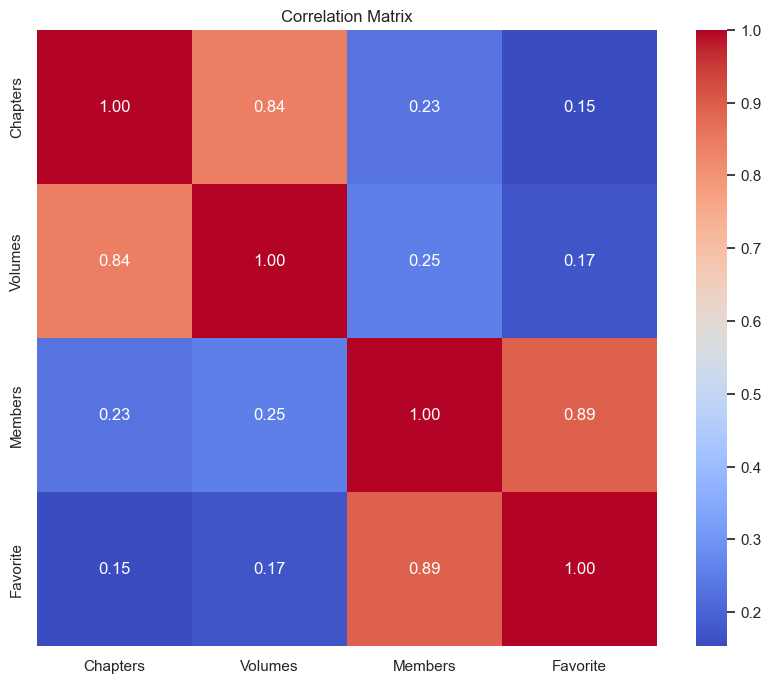

In [20]:
# Calculating correlation coefficients
manga_copy_df = manga_df.copy()
correlation_matrix = manga_copy_df[['Chapters', 'Volumes', 'Members', 'Favorite']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

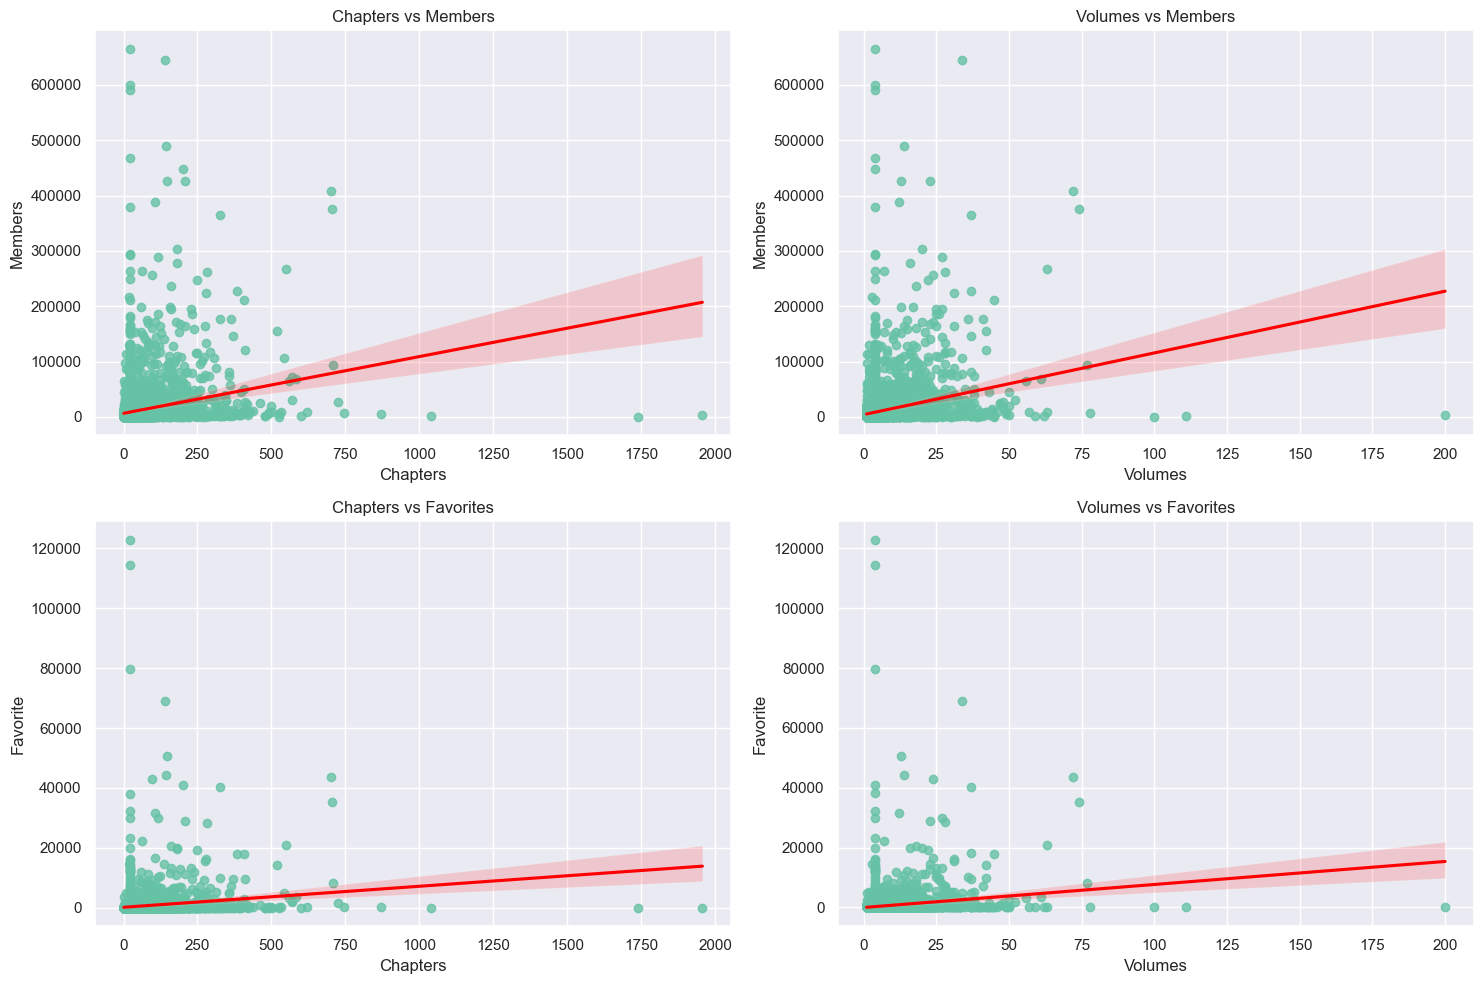

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Chapters vs Members
sns.regplot(x='Chapters', y='Members', data=manga_df, ax=axes[0, 0], line_kws={"color": "red"})
axes[0, 0].set_title('Chapters vs Members')

# Volumes vs Members
sns.regplot(x='Volumes', y='Members', data=manga_df, ax=axes[0, 1], line_kws={"color": "red"})
axes[0, 1].set_title('Volumes vs Members')

# Chapters vs Favorites
sns.regplot(x='Chapters', y='Favorite', data=manga_df, ax=axes[1, 0], line_kws={"color": "red"})
axes[1, 0].set_title('Chapters vs Favorites')

# Volumes vs Favorites
sns.regplot(x='Volumes', y='Favorite', data=manga_df, ax=axes[1, 1], line_kws={"color": "red"})
axes[1, 1].set_title('Volumes vs Favorites')

plt.tight_layout()
plt.show()

**COMMENTS:**

The correlation matrix and trendline plots provide insights into the relationships between the number of chapters and volumes of manga and their engagement metrics `Members` and `Favorites`:

+ **Correlation Matrix:** 

    + The high correlation between members and favorites might suggest that as a manga gains popularity and acquires more readers, those readers are likely to engage more with the content by marking it as a favorite. However, the correlation between the number of chapters or volumes and the engagement metrics (members and favorites) is relatively weak, which suggests that the length of a manga is not a strong predictor of its popularity or engagement.
    + *Chapters-Volumes:* There's a very strong positive correlation **0.84**, indicating that manga with more chapters typically have more volumes, which is expected since chapters are often compiled into volumes.
    + *Chapters-Members:* The correlation is positive but weak **0.23**, suggesting a slight tendency for manga with more chapters to have more members, although this relationship is not very strong.
    + *Chapters-Favorites:* There's a very weak positive correlation **0.15**, indicating that the number of chapters has a very slight and possibly negligible association with the number of favorites a manga has.
    + *Volumes-Members:* Similar to the Chapters-Members correlation, there is a weak positive correlation **0.25**, which means that manga with more volumes tend to have slightly more members.
    + *Volumes-Favorites:* The correlation is weak as well **0.17**, showing a slight positive association between the number of volumes and favorites.
    + *Members-Favorites:* There is a very strong positive correlation **0.89**, which is one of the most significant findings here. It indicates that the more members a manga has, the more favorites it tends to receive, suggesting that a larger audience size is strongly associated with higher engagement in terms of favoriting the manga.

+ **Trendline Analysis:** 

    + *Chapters vs Members:* The trend line indicates a positive relationship, suggesting that manga with more chapters tend to have more members. However, the wide confidence interval and the spread of the data points suggest that the number of chapters is not the only factor influencing the number of members.
    + *Volumes vs Members:* This plot also shows a positive trend, with manga having more volumes tending to have more members. Similarly to the previous plot, the spread of the data points is quite large, indicating variability that is not captured solely by the number of volumes.
    + *Chapters vs Favorites:* The positive trend is weaker here, with a lower slope and a wide confidence interval, indicating a less pronounced relationship between the number of chapters and the number of favorites.
    + *Volumes vs Favorites:* The positive relationship is also present, although, like the chapters, the number of volumes does not seem to be a strong predictor of the number of favorites, as evidenced by the spread of the data points.
    + In all plots, there is considerable scatter, suggesting that while there is a trend of more chapters or volumes being associated with higher numbers of members and favorites, there is significant variability that is not explained by these variables alone. This indicates the presence of other factors influencing reader engagement and membership size, such as the genre of the manga, the reputation of the author, the quality of the story and art, and how the manga is marketed and distributed.

## Question 02 <a class="anchor" id="Question 02"></a>

**Question 02:** How does the visualization of manga status distribution (finished, published, on hiatus) for the top 5 authors provide insights into the characteristics and working patterns of each author?
+ Purpose:
    + Explore author working patterns: Understand whether authors tend to finish their manga series, keep them ongoing, or put them on hiatus.
    + Analyze author productivity: Gain insights into the distribution of completed works and ongoing projects for each of the top 5 authors.
    + Visualize author traits: Consider whether certain manga statuses are characteristic of specific authors, providing a glimpse into their creative processes.
+ Analysis:
    + Transform data to represent manga status distribution for each author.
    + Calculate the total manga count for each author and sort them in descending order.
    + Visualize the distribution using pie charts for the top 5 authors, highlighting the proportion of each manga status.
    + Utilize size-adjusted pie charts to emphasize the influence of the total manga count on each author's representation.

In [22]:
manga_copy_df = manga_df.copy()

manga_copy_df['Author'] = manga_copy_df['Author'].apply(literal_eval)
all_authors = manga_copy_df['Author'].sum()
author_counts = pd.Series(all_authors).value_counts()

In [23]:
# Expanding the dataframe so that each row corresponds to a single author of a manga
expanded_data = manga_copy_df.explode('Author')
author_status_distribution = expanded_data.groupby(['Author', 'Status']).size().unstack(fill_value=0)
author_status_distribution['Total Manga'] = author_status_distribution.sum(axis=1)

# Sorting the total count of manga for each author
author_status_distribution = author_status_distribution.sort_values(by='Total Manga', ascending=False)

author_status_distribution.head(5)  


Status,Discontinued,Finished,On Hiatus,Publishing,Total Manga
Author,,,,,
Ryukishi07,0,41,0,1,42
Kamachi Kazuma,0,23,0,3,26
NISIO ISIN,0,22,0,2,24
CLAMP,0,17,2,4,23
Kishimoto Masashi,0,21,0,1,22


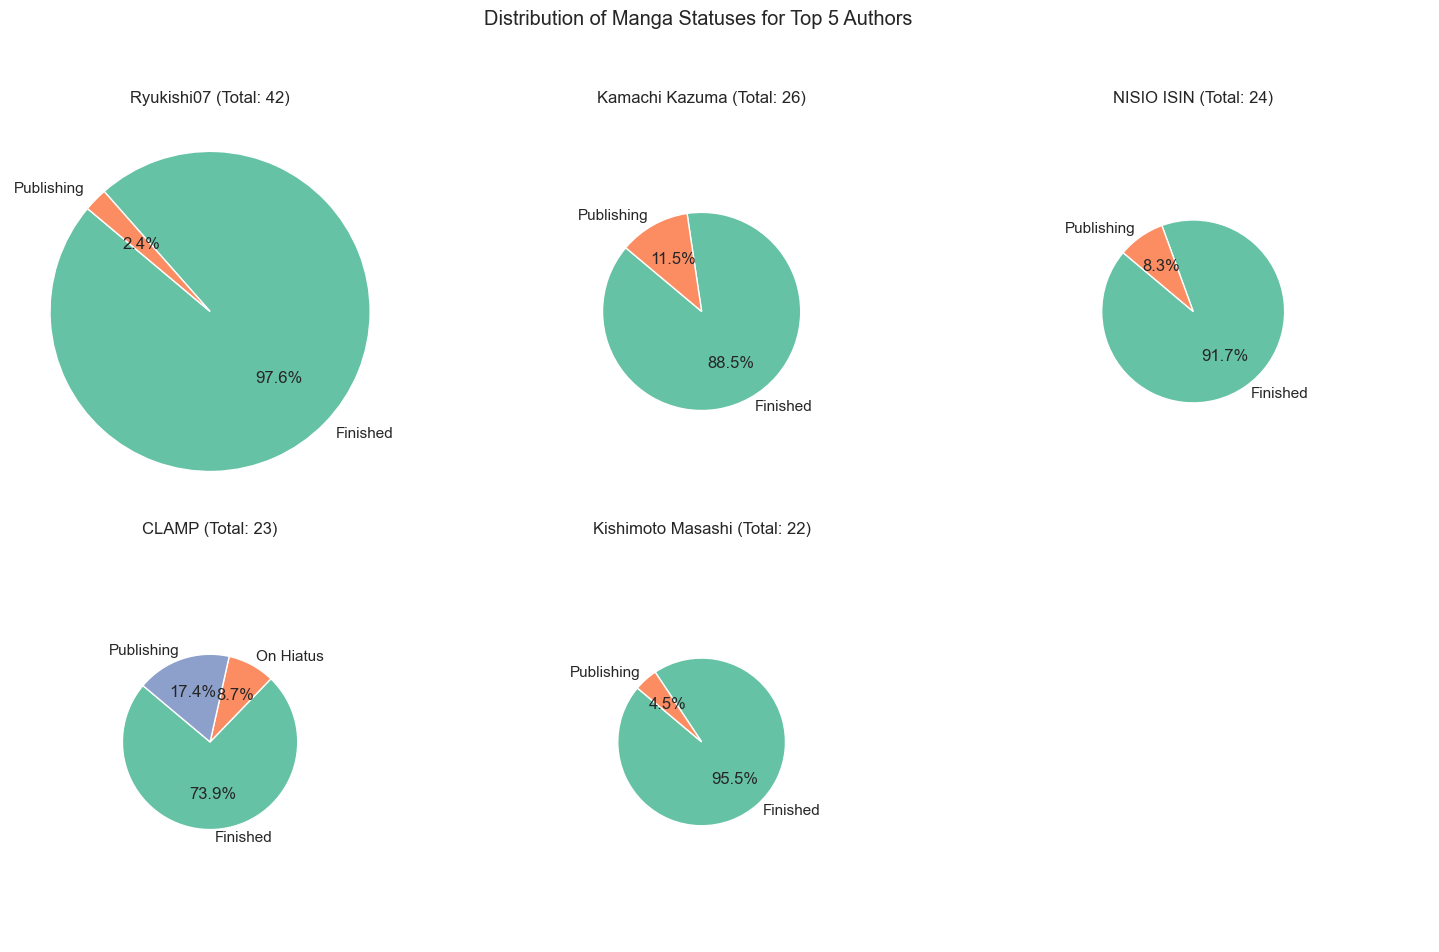

In [24]:
top_5_authors = author_status_distribution.head(5)

fig = plt.figure(figsize=(15, 10))
fig.suptitle('Distribution of Manga Statuses for Top 5 Authors')

def autopct_format(values):
    def my_format(pct):
        return ('%.1f%%' % pct) if pct > 0 else ''
    return my_format

for i, (author, data) in enumerate(top_5_authors.iterrows()):
    data = data.drop('Total Manga')
    # Only plot non-zero values
    non_zero_data = data[data > 0]
    
    ax = fig.add_subplot(2, 3, i+1)
    
    total_manga = top_5_authors.loc[author, 'Total Manga']
    size_factor = total_manga / top_5_authors['Total Manga'].max()
    ax.pie(non_zero_data, labels=non_zero_data.index, autopct=autopct_format(non_zero_data), startangle=140, radius=size_factor)
    ax.set_title(f'{author} (Total: {total_manga})')

# Hide the unused subplots
for j in range(i+1, 6):
    fig.add_subplot(2, 3, j+1).axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**COMMENTS:**
+ **The distribution of manga statuses for five authors:**
    + *Ryukishi07:* With a total of 42 manga series, an overwhelming **97.6%** are finished, which underscores a strong commitment to project completion. However, a small portion of **2.4%** are still publishing, pointing to some ongoing projects.
    + *Kamachi Kazuma:* Out of 26 series, **88.5%** are finished, while a notable **11.5%** are still being published, suggesting an active involvement in current projects alongside a solid track record of completed works.
    + *NISIO ISIN:* This author shows a high completion rate with **91.7%** of 24 series finished, and **8.3%** are still publishing, indicating a preference for seeing projects through to the end while still engaging in new endeavors.
    + *CLAMP:* With 23 series, there is a diversified status with **73.9%** finished, **17.4%** publishing, and a distinctive **8.7%** on hiatus, reflecting a dynamic approach to managing their portfolio of works.
    + *Kishimoto Masashi:* Demonstrates a very high completion rate with **95.5%** of 22 series finished and only **4.5%** still publishing, indicating a strong track record in finalizing projects.
+ **Insights into Characteristics and Working Patterns:**
    + *Completion Rate:* Ryukishi07, Kishimoto Masashi, and NISIO ISIN exhibit very high completion rates, which could suggest a disciplined approach to manga creation, possibly completing one series before moving to the next.
    + *Ongoing Projects:* Kamachi Kazuma and CLAMP show a healthy number of ongoing projects, indicating current active engagement in manga creation and a balance between finishing old projects and starting new ones.
    + *Hiatus Patterns:* CLAMP is unique in having a noticeable percentage of series on hiatus, which could imply a strategic pause to refine ideas or manage workload across multiple series.
    + *Productivity and Creative Process:* The data implies that while authors like Ryukishi07 and Kishimoto Masashi may have a more linear and focused creative process, others like CLAMP display a more complex, multitasking approach, possibly involving concurrent development of multiple series.

## Question 03 <a class="anchor" id="Question 03"></a>

**Question 03:** How have manga genres gained popularity over the years, and are there any identifiable patterns in their emergence?
+ Purpose:
    + Identify and visualize the most common manga genre for each year over a period of time.
    + It allows for tracking trends in manga genres over the years and understanding how the popularity of different genres has changed.
+ Analysis:
    + Examine the generated plot to observe patterns and trends in the most common manga genres over the years.
    + Look for any significant changes, spikes, or declines in specific genres.

In [25]:
manga_copy_df = manga_df.copy()
manga_copy_df['Year'] = pd.to_datetime(manga_copy_df['Release date'], errors='coerce').dt.year

def most_common_genre_per_year(df):
    genres_by_year = {}
    for year in sorted(df['Year'].unique()):
        year_data = df[df['Year'] == year]
        all_genres = np.concatenate(year_data['Genres'].dropna().apply(lambda x: re.sub(r"[\[\]']", '', x).split(', ')).tolist())
        if len(all_genres) > 0:  # Corrected condition
            genres, counts = np.unique(all_genres, return_counts=True)
            most_common = genres[counts.argmax()]
            genres_by_year[year] = most_common
    return genres_by_year

genres_by_year = most_common_genre_per_year(manga_copy_df)

genres_by_year

{1950: 'Adventure',
 1962: 'Action',
 1966: 'Drama',
 1967: 'Action',
 1968: 'Drama',
 1969: 'Action',
 1970: 'Drama',
 1971: 'Comedy',
 1972: 'Action',
 1973: 'Action',
 1974: 'Romance',
 1975: 'Romance',
 1976: 'Award Winning',
 1977: 'Action',
 1978: 'Award Winning',
 1979: 'Action',
 1980: 'Romance',
 1981: 'Drama',
 1982: 'Award Winning',
 1983: 'Adventure',
 1984: 'Adventure',
 1985: 'Adventure',
 1986: 'Action',
 1987: 'Comedy',
 1988: 'Comedy',
 1989: 'Action',
 1990: 'Action',
 1991: 'Fantasy',
 1992: 'Drama',
 1993: 'Drama',
 1994: 'Drama',
 1995: 'Drama',
 1996: 'Drama',
 1997: 'Drama',
 1998: 'Drama',
 1999: 'Drama',
 2000: 'Comedy',
 2001: 'Comedy',
 2002: 'Drama',
 2003: 'Romance',
 2004: 'Romance',
 2005: 'Romance',
 2006: 'Romance',
 2007: 'Romance',
 2008: 'Romance',
 2009: 'Romance',
 2010: 'Romance',
 2011: 'Comedy',
 2012: 'Romance',
 2013: 'Comedy',
 2014: 'Comedy',
 2015: 'Comedy',
 2016: 'Fantasy',
 2017: 'Fantasy',
 2018: 'Comedy',
 2019: 'Fantasy',
 2020: 'Roma

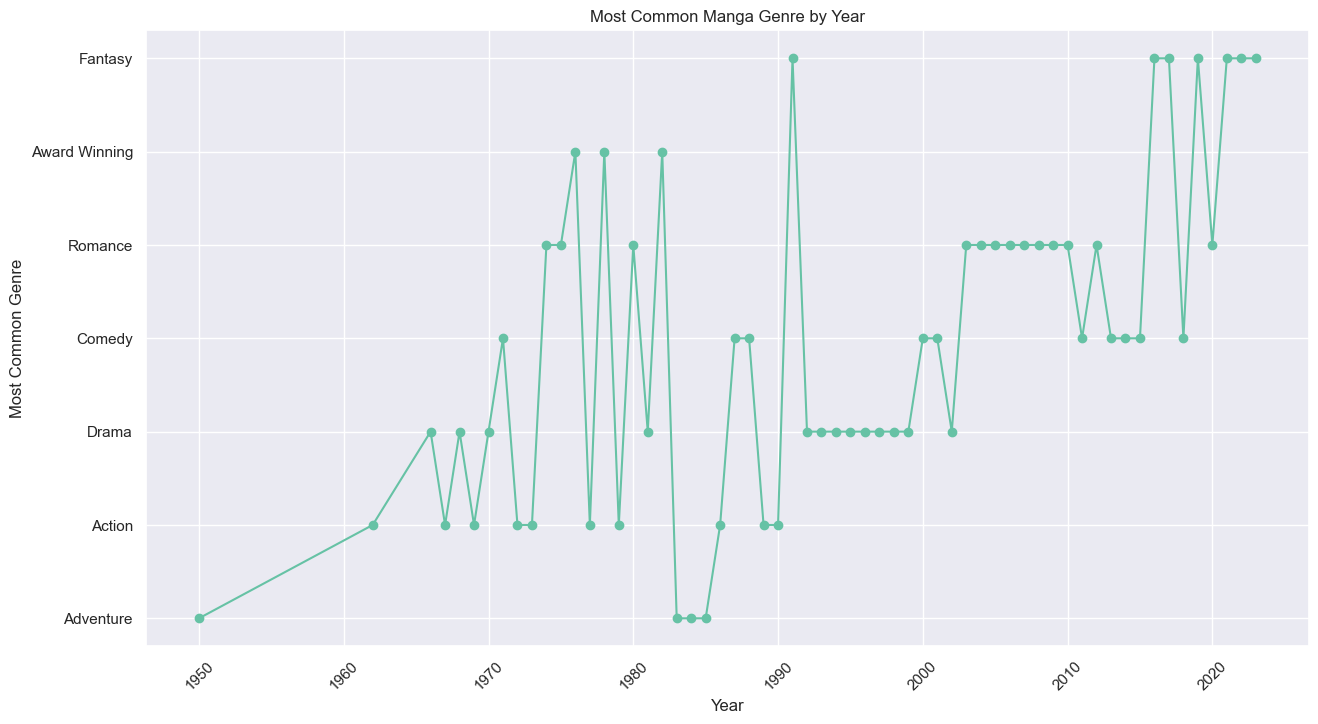

In [26]:
years = list(genres_by_year.keys())
common_genres = list(genres_by_year.values())

plt.figure(figsize=(15, 8))
plt.plot(years, common_genres, marker='o')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Most Common Genre')
plt.title('Most Common Manga Genre by Year')
plt.show()

**COMMENTS:**
+ **Trends:** There seems to be a fluctuation in the popularity of genres from year to year, which indicates that the most common genre is quite dynamic and changes frequently. It's possible that these changes are influenced by cultural shifts, the introduction of influential manga series, or changes in audience preferences.
    + Adventure was the most popular genre in the 1950s.
    + From the 1960s to the 1980s, there was a significant fluctuation in genre popularity, with no single genre consistently dominating.
    + Action gained a noticeable surge in popularity starting in the late 1980s, continuing into the early 2000s.
    + Drama and Comedy genres show a stable presence through the decades, indicating a consistent audience for these genres.
    + Romance and Award Winning genres do not show a consistent pattern but have their peaks, suggesting moments when these genres captured the public's interest.
+ **Shifts in Popularity:** There are noticeable shifts between certain genres. For instance, a genre might be popular for a few consecutive years before another genre takes over. This can be seen in the way 'Action' and 'Drama' alternate in certain periods.

## Question 04 <a class="anchor" id="Question 04"></a>

**Question 04:** What are the top manga genres determined by a composite score that accounts for the average favorite count, the number of mangas in each genre, their average score, and their popularity?
+ Purpose:
    + Identify and rank manga genres based on a composite score that considers factors such as average favorite count, the number of manga in each genre, their average score, and popularity.
    + This analysis aims to provide a holistic view of manga genres by combining multiple metrics, offering insights into the genres that excel across various criteria.
+ Analysis:
    + Explode the dataset so each genre gets a separate row with the manga details.
    + Group the data by genres and calculate:
        + Average favorite count per genre.
        + Number of mangas per genre.
        + Average score per genre.
        + Average popularity per genre.
    + Create a composite score combining these metrics.
    + Rank the genres based on this composite score and display the top genres.

In [27]:
manga_copy_df = manga_df.copy()
manga_copy_df['Genres'] = manga_copy_df['Genres'].apply(eval)

# Explode the dataset so each genre gets a separate row with the manga details
exploded_data_by_genre = manga_copy_df.explode('Genres')

# Grouping the data by genres and calculating the required metrics for each genre
genre_grouped = exploded_data_by_genre.groupby('Genres').agg({
    'Favorite': 'mean',  # Average favorite count
    'Score': 'mean',     # Average score
    'Title': 'count',    # Number of manga
    'Popularity': 'mean' # Average popularity
}).reset_index()

# Creating a composite score (simple average of the normalized scores of the four metrics)
scaler = MinMaxScaler()
genre_grouped[['Favorite_norm', 'Score_norm', 'Title_norm', 'Popularity_norm']] = scaler.fit_transform(
    genre_grouped[['Favorite', 'Score', 'Title', 'Popularity']]
)

genre_grouped['Composite_Score'] = genre_grouped[['Favorite_norm', 'Score_norm', 'Title_norm', 'Popularity_norm']].mean(axis=1)

sorted_by_composite_score = genre_grouped.sort_values(by='Composite_Score', ascending=False)

top_genres_by_composite_score = sorted_by_composite_score.head(10)
top_genres_by_composite_score[['Genres', 'Composite_Score']]


,Genres,Composite_Score
3,Award Winning,0.524960
6,Drama,0.417610
5,Comedy,0.415280
13,Romance,0.412245
8,Fantasy,0.407100
0,Action,0.398987
17,Supernatural,0.344915
1,Adventure,0.343694
4,Boys Love,0.342459
15,Slice of Life,0.305529


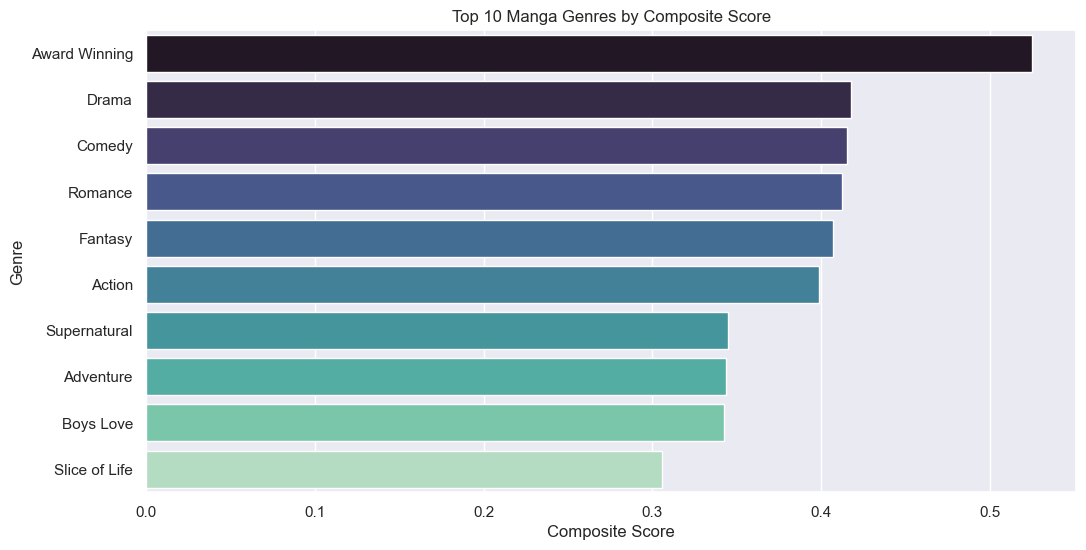

In [28]:
# Plotting the top genres by composite score
plt.figure(figsize=(12, 6))
sns.barplot(data=top_genres_by_composite_score, x='Composite_Score', y='Genres', palette="mako")
plt.title('Top 10 Manga Genres by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Genre')
plt.show()

**COMMENTS:**
+ *Award Winning* is the top-ranked genre, suggesting that titles in this category not only receive accolades but also perform well in terms of reader engagement and critical reception.
+ *Drama* and *Comedy* are the next genres in the ranking, indicating a strong preference for these themes among manga readers, possibly due to their broad appeal and versatility in storytelling.
+ *Romance* and *Fantasy* also score highly, which is consistent with global trends where these genres have a substantial fan base and a significant number of titles.
+ Genres like *Action*, *Supernatural*, and *Adventure* hold the middle ground in popularity. These genres often overlap in manga, suggesting that their combined elements resonate well with the audience.
+ *Boys Love* and *Slice of Life* are at the lower end among the top ten, which could be due to a more niche audience or fewer titles within these genres compared to others.

## Question 05 <a class="anchor" id="Question 05"></a>

## Question 06 <a class="anchor" id="Question 06"></a>

## Question 07 <a class="anchor" id="Question 07"></a>

## Question 08 <a class="anchor" id="Question 08"></a>

+ Question 08: How has the number of manga releases changed over time, and does it follow any patterns (e.g., seasonal)?
+ Purpose: 
    - Understand the historical development of manga: Trace the growth of the manga industry from its early stages to the present day.
    - Gain insights into manga release cycles: Reveal patterns in manga releases, valuable for publishers, fans, and professionals for informed planning.
+ Analysis: 
    
    

In [29]:
df_copy = manga_df.copy()
df_copy['Release date'] = pd.to_datetime(df_copy['Release date'], errors='coerce')
# group by year and count the number of manga released in each year
df_copy['Year'] = df_copy['Release date'].dt.year.astype('Int64')
df_copy['Month'] = df_copy['Release date'].dt.month.astype('Int64')
df_copy['Decade'] = df_copy['Year'] // 10 * 10
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
df_copy['Season'] = pd.cut(df_copy['Month'], [0, 3, 6, 9, 12], labels=seasons, include_lowest=True)
df_copy[['Release date', 'Year', 'Month', 'Season', 'Decade']].head()

,Release date,Year,Month,Season,Decade
0,1989-08-25,1989,8,Fall,1980
1,2004-01-19,2004,1,Spring,2000
2,1998-09-03,1998,9,Fall,1990
3,1997-07-22,1997,7,Fall,1990
4,1994-12-05,1994,12,Winter,1990


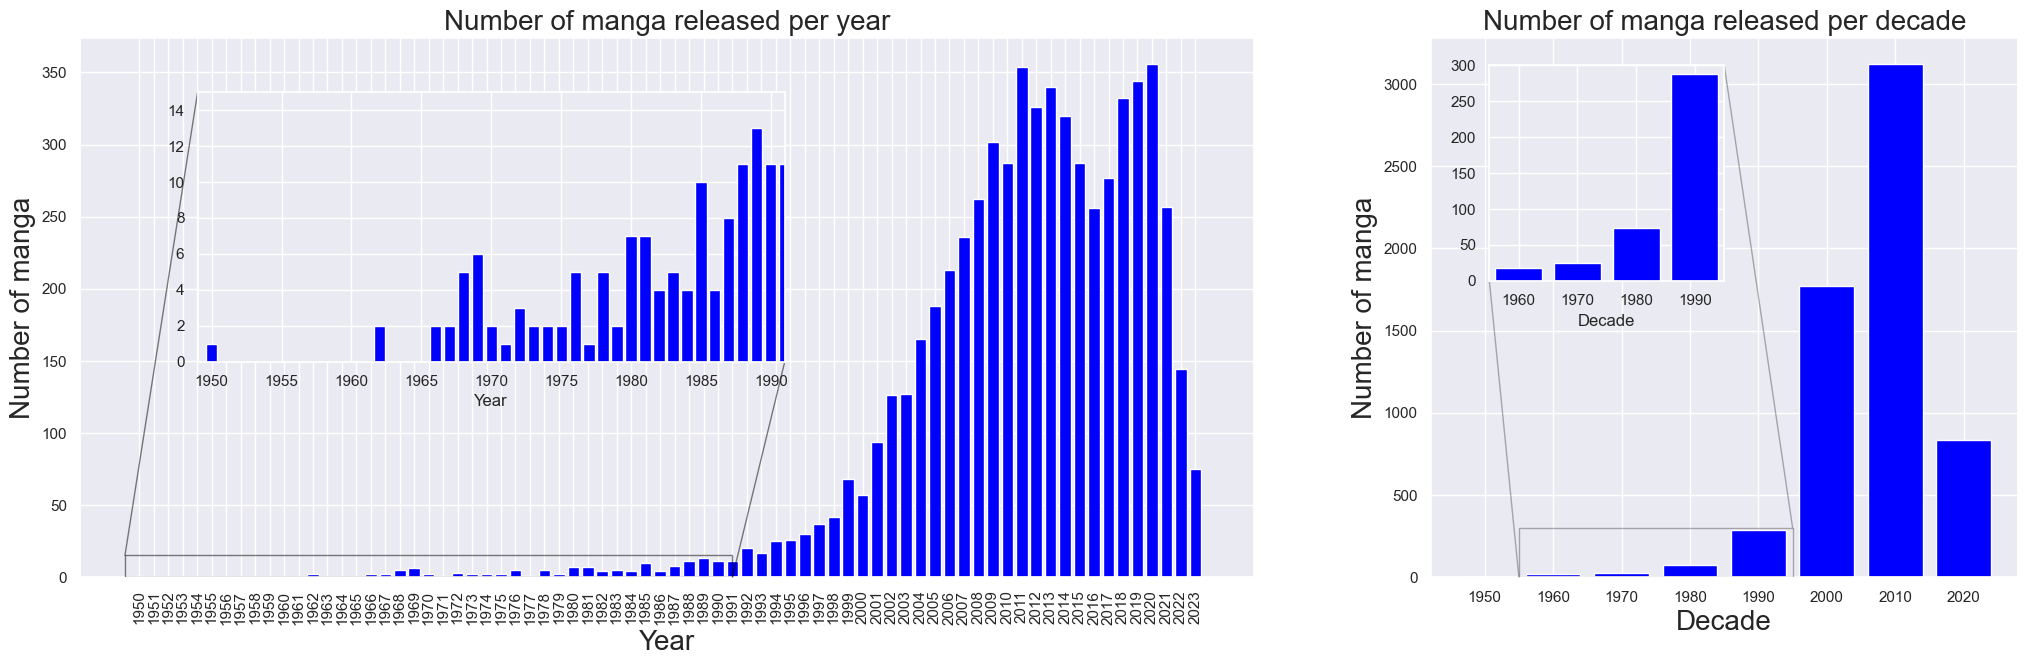

In [30]:
manga_per_year = df_copy.groupby('Year').size().reset_index(name='Count')
manga_per_decade = df_copy.groupby('Decade').size().reset_index(name='Count')
# Plotting the number of manga released per year and the number of manga released per decade
fig, axes = plt.subplots(1, 2, figsize=(25, 7), gridspec_kw={'width_ratios': [2, 1]})
sns.set_style('darkgrid')
axes[0].bar(manga_per_year['Year'], manga_per_year['Count'], color='blue')
axes[0].set_title('Number of manga released per year', fontsize=20)
axes[0].set_xlabel('Year', fontsize=20)
axes[0].set_ylabel('Number of manga', fontsize=20)
axes[0].set_xticks(range(1950, 2024, 1))
axes[0].set_xticklabels(range(1950, 2024, 1), rotation=90)



axin = axes[0].inset_axes([0.1, 0.4, 0.5, 0.5])
axin.bar(manga_per_year['Year'], manga_per_year['Count'], color='blue', width=0.8)
axin.set_xlim(1949, 1991)
axin.set_ylim(0, 15)
axin.set_xticks(range(1950, 1991, 5))
axin.set_xlabel('Year')
axin.set_ylabel('')


axes[0].indicate_inset_zoom(axin, edgecolor="black", linewidth=1, alpha=0.5)

axes[1].bar(manga_per_decade['Decade'], manga_per_decade['Count'], color='blue', width=8)
axes[1].set_title('Number of manga released per decade', fontsize=20)
axes[1].set_xlabel('Decade', fontsize=20)
axes[1].set_ylabel('Number of manga', fontsize=20)


axin = axes[1].inset_axes([0.1, 0.55, 0.4, 0.4])
axin.bar(manga_per_decade['Decade'], manga_per_decade['Count'], color='blue', width=8)
axin.set_xlim(1955, 1995)
axin.set_ylim(0, 300)
axin.set_xlabel('Decade')
axin.set_ylabel('')
axes[1].indicate_inset_zoom(axin, edgecolor="black", linewidth=1, alpha=0.3)

plt.show()


The two charts not only help us analyze the number of manga releases but also provide insights into the development of the Japanese manga industry:

- **Overview**: 

It is noticeable that the number of manga releases has been increasing over the years, but there has been a significant decrease in recent years (2020 onwards). The quantity of manga releases, as well as the development process of the Japanese manga industry, can be divided into several periods:

- **1950-1970: Early Stage**

Although there were manga works before this period in Japan, the dataset only has information from 1950. This period can be considered the inception of the Japanese manga industry, with a relatively limited number of manga releases, only a few mangas per year, with the highest being 6 mangas in 1969.

- **1970-1990: Initial Development**

During this period, the number of manga releases increased compared to the previous stage, indicating the beginning of the development of the Japanese manga industry. The quantity of manga releases gradually increased each year, around 7-8 mangas per year. This period also marked the time when the Japanese manga industry began to spread globally with works like Dragon Ball, Tsubasa, etc.

- **1990-2010: Strong Development**

This period witnessed a significant surge in the number of manga releases compared to the previous stage (from 10 mangas per year to over 200 mangas per year). It was also a time when the Japanese manga industry expanded globally with famous works such as Naruto, One Piece, Bleach, etc.

- **2010-present: Peak and Recent Decline**

This period saw the Japanese manga industry reaching its peak in terms of the quantity of manga releases, global popularity, and coverage, with over 300 mangas per year, reaching the pinnacle at 356 mangas in 2020. However, from 2020 onwards, possibly due to the heavy impact of the Covid-19 pandemic, the number of manga releases has significantly declined.




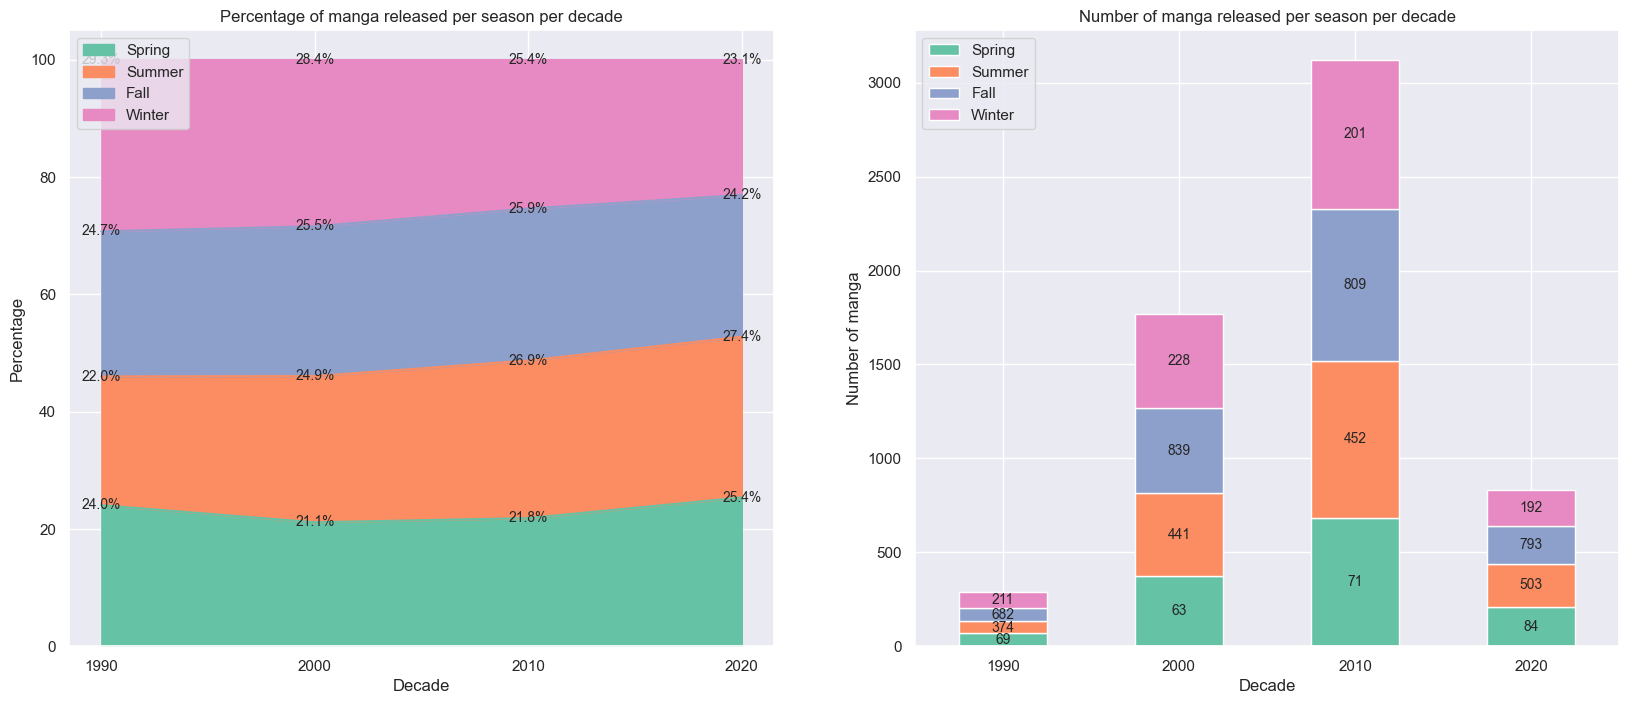

In [31]:
sns.set(style="darkgrid")
sns.set_palette("Set2")

manga_per_season = df_copy[df_copy['Year'] >= 1990].groupby(['Decade', 'Season']).size().reset_index(name='Count')
manga_per_season['Percentage'] = manga_per_season['Count'] / manga_per_season.groupby('Decade')['Count'].transform('sum') * 100

fig, ax = plt.subplots(1, 2, figsize=(20, 8))

manga_per_season.groupby(['Decade', 'Season'])['Percentage'].sum().unstack().plot(kind='area', stacked=True, ax=ax[0])
ax[0].set_title('Percentage of manga released per season per decade')
ax[0].set_xlabel('Decade')
ax[0].set_ylabel('Percentage')
ax[0].legend(loc='upper left')
ax[0].set_xticks(range(1990, 2030, 10))

manga_per_season.groupby(['Decade', 'Season'])['Count'].sum().unstack().plot(kind='bar', stacked=True, ax=ax[1])
ax[1].set_title('Number of manga released per season per decade')
ax[1].set_xlabel('Decade')
ax[1].set_ylabel('Number of manga')
ax[1].legend(loc='upper left')
ax[1].set_xticklabels(manga_per_season['Decade'].unique(), rotation=0)

for decade, row in manga_per_season.groupby('Decade'):
    if decade in ax[0].get_xticks():
        temp = 0
        for season, percentage in row.set_index('Season')['Percentage'].items():
            x_pos = decade
            temp += percentage
            y_pos = temp
            ax[0].text(x_pos, y_pos, f"{percentage:.1f}%", ha='center', va='center', fontsize=10)

bars = ax[1].patches
for bar, (index, decade, season, count) in zip(bars, manga_per_season[['Decade', 'Season', 'Count']].itertuples()):
    x_pos = bar.get_x() + bar.get_width() / 2
    y_pos = bar.get_y() + bar.get_height() / 2
    ax[1].text(x_pos, y_pos, f"{count:,}", ha='center', va='center', fontsize=10)

plt.show()


## Question 09 <a class="anchor" id="Question 09"></a>

+ **Question**: How are the `Genres` and preferences of readers?
+ **Purpose**: To determine which genres are popular among readers and to identify the genres for which readers give high voting scores.
+ **Analysis**: 
    + Calculate the top 5 genres with the highest popularity scores
    + Calculate the top 5 genres with the highest voting scores

**The number of times each genre appears in all comics**

In [32]:
manga_copy_df = manga_df.copy()

listGenresColumns = manga_copy_df['Genres'].tolist()
listGenresColumns = [ast.literal_eval(listGenres) for listGenres in listGenresColumns]
listGenresColumns

genreCount = {}

genreCount = Counter(genre for listGenres in listGenresColumns for genre in listGenres)

df_genre_count = pd.DataFrame([genreCount.values()], columns=genreCount.keys())

df_genre_count = df_genre_count.rename(index={0: 'Count'})

df_genre_count

,Action,Adventure,Award Winning,Drama,Fantasy,Horror,Supernatural,Mystery,Sports,Slice of Life,Sci-Fi,Comedy,Romance,Ecchi,Suspense,Boys Love,Girls Love,Gourmet,Avant Garde
Count,1801,889,255,1866,1988,300,1323,556,144,938,597,2482,2518,397,113,285,207,78,4


In [33]:
manga_copy_df['Genres'] = manga_copy_df['Genres'].apply(eval)
df_genres_expanded = manga_copy_df.explode('Genres').reset_index()

popular_genre = df_genres_expanded.groupby('Genres')['Popularity'].mean().sort_values(ascending=False).index[0:5]

score_genre = df_genres_expanded.groupby('Genres')['Score'].mean().sort_values(ascending=False).index[0:5]

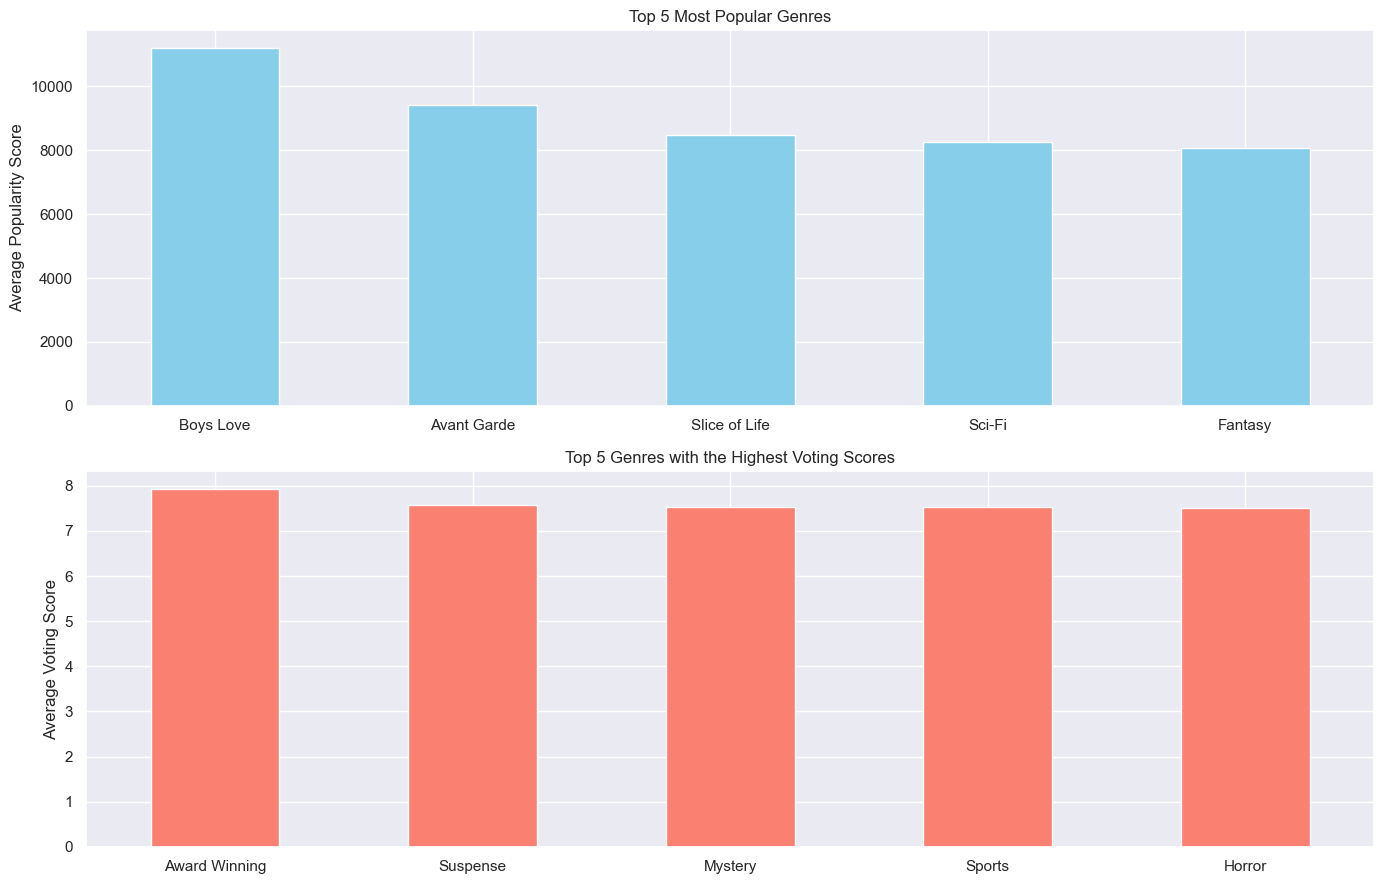

In [34]:
popular_genre_data = df_genres_expanded[df_genres_expanded['Genres'].isin(popular_genre)]
popular_genre_data = popular_genre_data.groupby('Genres')['Popularity'].mean().sort_values(ascending=False)

score_genre_data = df_genres_expanded[df_genres_expanded['Genres'].isin(score_genre)]
score_genre_data = score_genre_data.groupby('Genres')['Score'].mean().sort_values(ascending=False)

fig, axes = plt.subplots(nrows=2, figsize=(14, 9))

popular_genre_data.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Top 5 Most Popular Genres')
axes[0].set_ylabel('Average Popularity Score')
axes[0].set_xlabel('')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

score_genre_data.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Top 5 Genres with the Highest Voting Scores')
axes[1].set_ylabel('Average Voting Score')
axes[1].set_xlabel('')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

## Question 10 <a class="anchor" id="Question 10"></a>

+ **Question**: The relationship between `Status` and variables such as the number of `Recommended` ratings and `Release date` ?
+ **Purpose**: 
    + Analyzing the relationship between `Status` and the number of `Recommended` ratings can provide information about the interest and positive feedback from the reader community.
    + Examining the relationship between `Status` and the `Release date` can help us better understand how an item develops over time. 
+ **Analysis**: 
    + Draw a box plot between `Status` and `Recommended`
    + Measure the correlation between `Status` and `Release date`

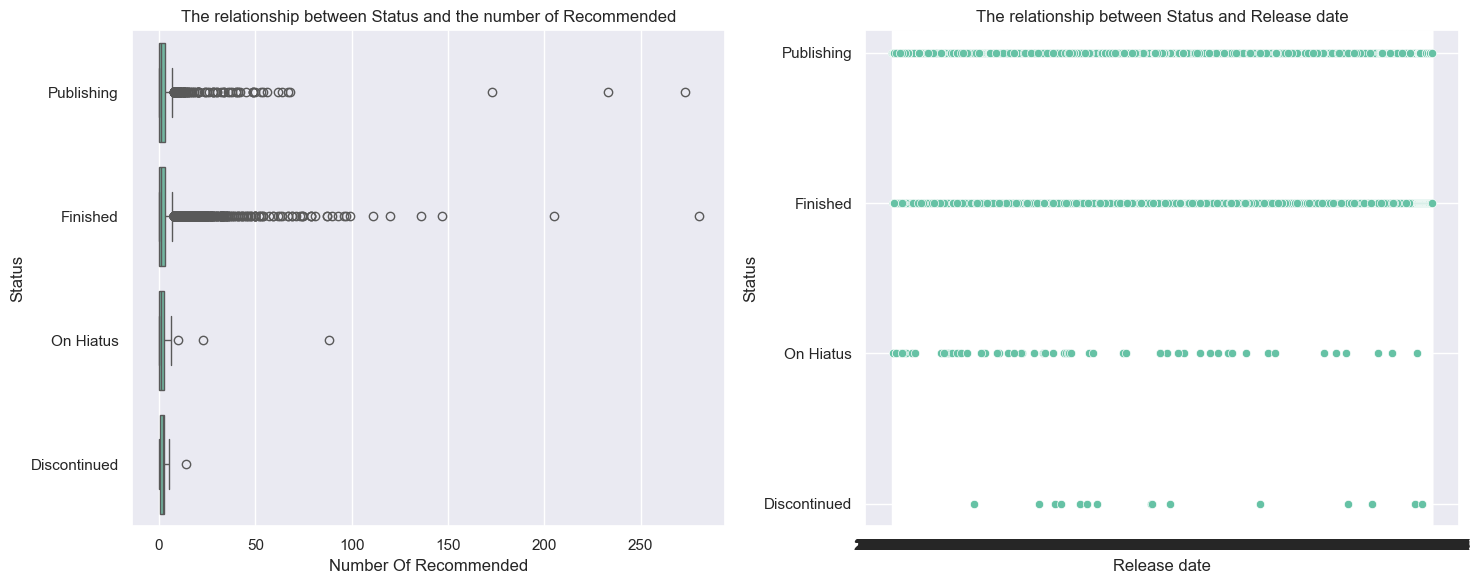

ValueError: could not convert string to float: '1989-08-25'

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(x='Recommended', y='Status', data=manga_copy_df, ax=axes[0])
axes[0].set_title('The relationship between Status and the number of Recommended')
axes[0].set_xlabel('Number Of Recommended')
axes[0].set_ylabel('Status')

sns.scatterplot(x='Release date', y='Status', data=manga_copy_df, ax=axes[1])
axes[1].set_title('The relationship between Status and Release date')
axes[1].set_xlabel('Release date')
axes[1].set_ylabel('Status')

plt.tight_layout()
plt.show()

correlation_status_time = manga_copy_df['Status'].astype('category').cat.codes.corr(manga_copy_df['Release date'])
print(f'The correlation coefficient between Status and Release date: {correlation_status_time}')